In [1]:
# Imports

from math import cos, sin, pi as π
from IPython.display import display, Markdown
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import partial_trace, Statevector

The cell below runs the quantum teleportation circuit and shows the state vector resulting at each stage of the computation.

You can experiment with $\theta$ and $\phi$ to create a general input state
$$
|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle
$$
and observe the teleportation of the state.

Some examples are:

| State | $\theta$ | $\phi$ |
|-------|----------|--------|
| $\|0\rangle$ | 0 | 0 |
| $\|1\rangle$ | $\pi$ | 0 |
| $\frac{1}{\sqrt{2}}(\|0\rangle + i\|1\rangle)$ | $\frac{\pi}{2}$ | $\frac{\pi}{2}$ |

In the statevector calculations below, the statevector for a single qubit is obtained from the system state by tracing out the other qubits.
This is a way to ``factorize'' a product state $|a\rangle\otimes|b\rangle$ into its parts $|a\rangle$ and $|b\rangle$. 
However, product states do not have unique facorizations, because $|a\rangle\otimes|b\rangle = e^{i\theta}|a\rangle\otimes e^{-i\theta}|b\rangle$ for any real $\theta$.
So, in some cases the statevector shown below may be different from the expected one by a global phase factor.

Matplotlib is building the font cache; this may take a moment.


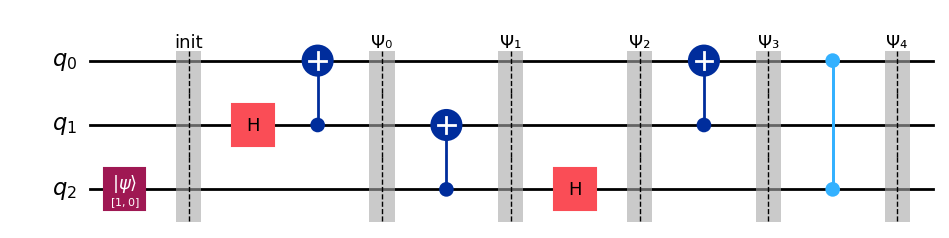

In [2]:
def create_state(θ, φ):
    α = cos(θ/2)
    β = sin(θ/2) * (cos(φ) + 1j * sin(φ)) # exp(iφ) sin(θ/2)
    return Statevector([α, β])


def create_circuit(initial_state = create_state(0, 0)):
    q = [q0, q1, q2] = QuantumRegister(3, 'q')
    circuit = QuantumCircuit(q)
    circuit.initialize(initial_state, q2)
    circuit.save_statevector(label = "init")
    circuit.h(q1)
    circuit.cx(q1, q0)
    circuit.save_statevector(label = "Ψ₀")
    circuit.cx(q2, q1)
    circuit.save_statevector(label = "Ψ₁")
    circuit.h(q2)
    circuit.save_statevector(label = "Ψ₂")
    circuit.cx(q1, q0)
    circuit.save_statevector(label = "Ψ₃")
    circuit.cz(q2, q0)
    circuit.save_statevector(label = "Ψ₄")
    return circuit


circuit = create_circuit()
display(circuit.draw('mpl'))

In [4]:
# Basis state |0⟩
# θ = 0

# φ = 0

# Basis state |1⟩
# θ = π
# φ = 0

# Another state: 1/√2 (|0⟩ + i|1⟩)
θ = π/2
φ = π/2

circuit = create_circuit(create_state(θ, φ))
simulator = AerSimulator()
result = simulator.run(circuit).result()
statevectors = result.data(0)
init = statevectors["init"]
input = partial_trace(init, [0, 1]).to_statevector() # extract the state of just the input qubit (q2)
Ψ0 = statevectors["Ψ₀"]
Ψ1 = statevectors["Ψ₁"]
Ψ2 = statevectors["Ψ₂"]
Ψ3 = statevectors["Ψ₃"]
Ψ4 = statevectors["Ψ₄"]
output = partial_trace(Ψ4, [1, 2]).to_statevector() # extract the state of just the output qubit (q0)


def fmt_sv(statevector):
    return statevector.draw('latex_source').replace('|', r'\|') # escape | for use in Markdown table


display(Markdown(f"""Stage | State
---    | ---
Input  | ${fmt_sv(input)}$ (up to a phase difference)
init   | ${fmt_sv(init)}$
Ψ₀     | ${fmt_sv(Ψ0)}$
Ψ₁     | ${fmt_sv(Ψ1)}$
Ψ₂     | ${fmt_sv(Ψ2)}$
Ψ₃     | ${fmt_sv(Ψ3)}$
Ψ₄     | ${fmt_sv(Ψ4)}$
Output | ${fmt_sv(output)}$ (up to a phase difference)
"""))


Stage | State
---    | ---
Input  | $\frac{\sqrt{2}}{2} \|0\rangle+\frac{\sqrt{2} i}{2} \|1\rangle$ (up to a phase difference)
init   | $\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|100\rangle$
Ψ₀     | $\frac{1}{2} \|000\rangle+\frac{1}{2} \|011\rangle+\frac{i}{2} \|100\rangle+\frac{i}{2} \|111\rangle$
Ψ₁     | $\frac{1}{2} \|000\rangle+\frac{1}{2} \|011\rangle+\frac{i}{2} \|101\rangle+\frac{i}{2} \|110\rangle$
Ψ₂     | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2} i}{4} \|010\rangle+\frac{\sqrt{2}}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle- \frac{\sqrt{2} i}{4} \|101\rangle- \frac{\sqrt{2} i}{4} \|110\rangle+\frac{\sqrt{2}}{4} \|111\rangle$
Ψ₃     | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2}}{4} \|010\rangle+\frac{\sqrt{2} i}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle- \frac{\sqrt{2} i}{4} \|101\rangle+\frac{\sqrt{2}}{4} \|110\rangle- \frac{\sqrt{2} i}{4} \|111\rangle$
Ψ₄     | $\frac{\sqrt{2}}{4} \|000\rangle+\frac{\sqrt{2} i}{4} \|001\rangle+\frac{\sqrt{2}}{4} \|010\rangle+\frac{\sqrt{2} i}{4} \|011\rangle+\frac{\sqrt{2}}{4} \|100\rangle+\frac{\sqrt{2} i}{4} \|101\rangle+\frac{\sqrt{2}}{4} \|110\rangle+\frac{\sqrt{2} i}{4} \|111\rangle$
Output | $\frac{\sqrt{2}}{2} \|0\rangle+\frac{\sqrt{2} i}{2} \|1\rangle$ (up to a phase difference)
